# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>learning_rate</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>learning_rate</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [1]:
import pandas
import numpy as np
data = pandas.read_csv('./preprocessed_data.csv')

In [2]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
X = data.drop("project_is_approved",axis=1)
y = data['project_is_approved'].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(73196, 8) (73196,)
(36052, 8) (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [4]:
import pickle
with open('./glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h3>1.3.1 Vectorizing Essays</h3>

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [6]:
#For tdidf_weighted w2v for train Data
from tqdm import tqdm
import numpy as np
essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_train.append(vector)

print(len(essay_train))
print(len(essay_train[0]))

100%|██████████| 73196/73196 [02:17<00:00, 532.56it/s]

73196
300


In [7]:
#for prepareing test data
from tqdm import tqdm
import numpy as np
essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    essay_test.append(vector)

print(len(essay_test))
print(len(essay_test[0]))

100%|██████████| 36052/36052 [01:10<00:00, 509.04it/s]

36052
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

### *In response_code_fit function:-* ###

1. we take X_train["categories"] and y_train values(represented as X,y in the function) and fit it.
2. di = we determine total number of times each "category" has occoured using value_counts() function.
3. In for loop:-
    a. cat_0 - refers to all the values where y==0 for the "category_name". ((X == key) & (y == 0)).sum() expression
                gives the value of cat_0.
    b. cat_1 - refers to all the values where y==1 for the "category_name". ((X == key) & (y == 1)).sum() expression
                gives the value of cat_1.
4. we return a dictonary "d" with key="name_of_category" and value = ["response_code_for_category_0","response_code_for_category_1"]

### *In response_code_transform function:-* ###
1. We take the fitted dictonary "d" which we get from response_code_fit function and X is a pandas.series of categories.
2. We make two copies of the X inside the function. Ser_0 for all response code when y==0 for the corresponding category, 
    Ser_1 for all response code for when y == 1 for the corresponding category.
3. We determine all the unique "categories" with val_counts = Ser_0.value_counts().
4. We iterate through all the unique categories:-
     1. if the category is not prespent in the fitted dictonary "d":-
        1. We go replace all the values in Ser_0 for that category with 0.5 and similarly in Ser_1.
     2. else we use values in  the fitted dictonary "d" for replcaing the values in Ser_0 and Ser_1.
5. We return a numpy array with two columns where col_0 is response code when y==0 for the corresponding category, and similarly col_1.


In [11]:
def response_code_fit(X,y):
    d = dict()
    di = dict(X.value_counts())
    for key,value in di.items():
        arr = []
        cat_0 = ((X == key) & (y == 0)).sum()
        cat_1 = ((X == key) & (y == 1)).sum()
        arr.append((cat_0/value))
        arr.append((cat_1/value))
        d[key] = arr
    
    return d #fitted dictonary

def response_code_transform(d,X):
    Ser_0 = X.copy()
    Ser_1 = X.copy()
    val_counts = Ser_0.value_counts()
    for key in val_counts.keys():
        if key not in d.keys():  #handeling categories not present in the train data
            Ser_0.mask(Ser_0==key,0.5,inplace=True)
            Ser_1.mask(Ser_1==key,0.5,inplace=True)
        else:
            Ser_0.mask(Ser_0==key, d[key][0],inplace=True)
            Ser_1.mask(Ser_1==key, d[key][1],inplace=True)
    Ser_0 = Ser_0.to_numpy()
    Ser_0 = Ser_0.reshape(-1,1)
    Ser_1 = Ser_1.to_numpy()
    Ser_1 = Ser_1.reshape(-1,1)
    Ser = np.hstack((Ser_0,Ser_1))
    
    return Ser

In [12]:
#School State
fit_dict = response_code_fit(X_train['school_state'],y_train)
school_state_train = response_code_transform(fit_dict,X_train['school_state'])
school_state_test = response_code_transform(fit_dict,X_test['school_state'])

In [13]:
#teacher Prefix
fit_dict = response_code_fit(X_train['teacher_prefix'],y_train)
teacher_prefix_train = response_code_transform(fit_dict,X_train['teacher_prefix'])
teacher_prefix_test = response_code_transform(fit_dict,X_test['teacher_prefix'])

In [14]:
#project_grade_ category
fit_dict = response_code_fit(X_train['project_grade_category'],y_train)
project_grade_category_train = response_code_transform(fit_dict,X_train['project_grade_category'])
project_grade_category_test = response_code_transform(fit_dict,X_test['project_grade_category'])

In [15]:
#clean_category
fit_dict = response_code_fit(X_train['clean_categories'],y_train)
clean_categories_train = response_code_transform(fit_dict,X_train['clean_categories'])
clean_categories_test = response_code_transform(fit_dict,X_test['clean_categories'])

In [16]:
#clean_subctegory
fit_dict = response_code_fit(X_train['clean_subcategories'],y_train)
clean_subcategories_train = response_code_transform(fit_dict,X_train['clean_subcategories'])
clean_subcategories_test = response_code_transform(fit_dict,X_test['clean_subcategories'])

In [17]:
#Normalizing Price Data
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))

X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

In [18]:
#teacher_number_of_previously_posted_projects
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_prev_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_prev_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

In [19]:
X_tr = np.hstack((essay_train,school_state_train, teacher_prefix_train, project_grade_category_train, X_train_price_norm,clean_categories_train, clean_subcategories_train,X_train_prev_norm))

X_te = np.hstack((essay_test, school_state_test, teacher_prefix_test, project_grade_category_test, X_test_price_norm,clean_categories_test ,clean_subcategories_test,X_test_prev_norm))

In [20]:
X_tr.shape

(73196, 312)

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
params = {'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[1,10,30,50,100]}
grid_search = GridSearchCV(model,params,'roc_auc',return_train_score=True,n_jobs=-1)
grid_search.fit(X_tr,y_train)

D:\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass scoring=roc_auc as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [1, 10, 30, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [22]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [23]:
points_for_plot_train = []
points_for_plot_test = []
points_for_plot = []

for param in grid_search.cv_results_['params']:
  learning_rate = param['learning_rate']
  n_estimators = param['n_estimators']
  lis = [learning_rate,n_estimators]
  points_for_plot.append(lis)


mean_test_score = grid_search.cv_results_['mean_test_score']

mean_train_score = grid_search.cv_results_['mean_train_score']

points_for_plot_train = points_for_plot[:]
points_for_plot_test = points_for_plot[:]


i = 0
for point in points_for_plot_train:
  point.append(mean_train_score[i])
  i = i+1


i = 0
for point in points_for_plot_test:
  point.append(mean_test_score[i])
  i = i+1


points_for_plot_train = np.array(points_for_plot_train)
points_for_plot_test = np.array(points_for_plot_test)

In [24]:
import matplotlib.pyplot as plt
import plotly.graph_objs as go

x1 = points_for_plot_train[:,0]
y1 = points_for_plot_train[:,1]
z1 = points_for_plot_train[:,2]

x2 = points_for_plot_test[:,0]
y2 = points_for_plot_test[:,1]
z2 = points_for_plot_test[:,3]

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='learning_rate'),
        yaxis = dict(title='min_sample_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
fig.show()
plt.show()

In [25]:
best_model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100)
best_model.fit(X_tr,y_train)

GradientBoostingClassifier()

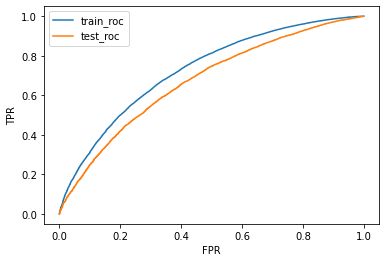

In [26]:
y_train_predicted = best_model.predict_proba(X_tr)
y_test_predicted = best_model.predict_proba(X_te)
y_train_predicted
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_train,y_train_predicted[:,1])
auc_score
#roc on train and test
from sklearn.metrics import roc_curve
train_fpr,train_tpr,_ = roc_curve(y_train,y_train_predicted[:,1])
plt.plot(train_fpr,train_tpr,label='train_roc')
test_fpr,test_tpr,_ = roc_curve(y_test,y_test_predicted[:,1])
plt.plot(test_fpr,test_tpr,label='test_roc')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

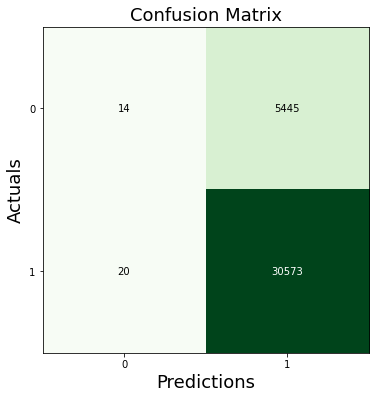

In [27]:
from sklearn.metrics import confusion_matrix
y_test_predicted = best_model.predict(X_te)
confusion_matrix = confusion_matrix(y_test,y_test_predicted)

from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [28]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "Auc"]
x.add_row(["TFIDF-W2V","Gradient Boosting Classifier",grid_search.best_params_,str(grid_search.best_score_)])
print(x)

+------------+------------------------------+---------------------------------------------+--------------------+
| Vectorizer |            Model             |               Hyper Parameter               |        Auc         |
+------------+------------------------------+---------------------------------------------+--------------------+
| TFIDF-W2V  | Gradient Boosting Classifier | {'learning_rate': 0.1, 'n_estimators': 100} | 0.6834206573648526 |
+------------+------------------------------+---------------------------------------------+--------------------+
